<a href="https://colab.research.google.com/github/jahnvisikligar/Online_Retail_Analysis/blob/main/Online_retail_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.kaggle.com/jahnvisikligar/online-retail-js?scriptVersionId=90326309" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
#reading CSV file
df = pd.read_csv("/content/online_retail_II.csv")

> # **Part 1: Exploratory Data Analysis**





> In this step we doing the basic exploration of data and cleaning of it as well.



In [5]:
#computing shape
df.shape

(1067371, 8)

In [6]:
#checking for columns in CSV
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [7]:
#checking for head of CSV
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
#checking for tail of CSV
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [9]:
#sample of 5
df.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
893270,568908,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,9,2011-09-29 13:38:00,2.55,16653.0,United Kingdom
150394,503721,84536A,ENGLISH ROSE NOTEBOOK A7 SIZE,3,2010-04-06 15:37:00,0.81,NaN,United Kingdom
90754,497932,21243,PINK SPOTTY PLATE,8,2010-02-15 10:12:00,1.69,12391.0,Cyprus
597831,542241,84997B,RED 3 PIECE RETROSPOT CUTLERY SET,4,2011-01-26 14:51:00,3.75,16409.0,United Kingdom
728934,554514,20711,JUMBO BAG TOYS,1,2011-05-24 15:58:00,4.13,NaN,United Kingdom


In [10]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [11]:
#exploring the unique values of each attribute
print("Number of transactions: ", df['Invoice'].nunique())
print("Number of products: ",df['StockCode'].nunique())
print("Number of customers:", df['Customer ID'].nunique() )
print("Percentage of customers NA: ", round(df['Customer ID'].isnull().sum() * 100 / len(df),2),"%" )
print('Number of countries: ',df['Country'].nunique())

Number of transactions:  53628
Number of products:  5305
Number of customers: 5942
Percentage of customers NA:  22.77 %
Number of countries:  43


In [12]:
#removing duplicates
print("Number of transactions before duplicates removal : %d " % df.shape[0])
# Dropping the duplicated transactions
df = df.drop(index=df[df.duplicated()].index)
print("Number of transactions after duplicates removal  : %d " % df.shape[0])

Number of transactions before duplicates removal : 1067371 
Number of transactions after duplicates removal  : 1033036 


In [13]:
#dropping quantities with NA values
df.dropna(inplace=True)
#df.drop(index = df[df['Quantity'] <= 0].index)
df = df.reset_index(drop=True)
df.dropna()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
797880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
797881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
797882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
797883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


>  **Verification of dimensions of data after removing NA values**

In [14]:
df.shape

(797885, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797885 entries, 0 to 797884
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 48.7+ MB


In [16]:
df["Country"].value_counts()

United Kingdom          716115
Germany                  17339
EIRE                     16014
France                   13897
Netherlands               5137
Spain                     3754
Belgium                   3110
Switzerland               3058
Portugal                  2414
Australia                 1890
Channel Islands           1646
Italy                     1507
Sweden                    1343
Norway                    1308
Cyprus                    1157
Finland                   1049
Austria                    938
Denmark                    797
Greece                     663
Japan                      565
USA                        535
Poland                     527
Unspecified                521
United Arab Emirates       386
Singapore                  346
Israel                     321
Malta                      299
Canada                     228
Iceland                    222
Lithuania                  154
RSA                        123
Brazil                      94
Thailand

In [17]:
#exploring the unique values of each attribute
print("Number of transactions: ", df['Invoice'].nunique())
print("Number of products: ",df['StockCode'].nunique())
print("Number of customers:", df['Customer ID'].nunique() )
print("Percentage of customers NA: ", round(df['Customer ID'].isnull().sum() * 100 / len(df),2),"%" )
print('Number of countries: ',df['Country'].nunique())

Number of transactions:  44876
Number of products:  4646
Number of customers: 5942
Percentage of customers NA:  0.0 %
Number of countries:  41


In [18]:
df.describe()

,Quantity,Price,Customer ID
count,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777
std,191.670371,71.392549,1696.466663
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13964.000000
50%,5.000000,1.950000,15228.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
df.corr()

,Quantity,Price,Customer ID
Quantity,1.000000,-0.001918,-0.005171
Price,-0.001918,1.000000,-0.003789
Customer ID,-0.005171,-0.003789,1.000000


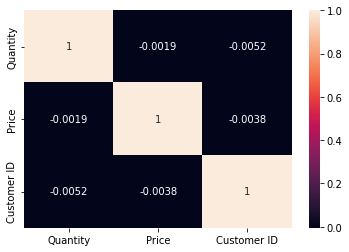

In [20]:
sns.heatmap(df.corr(), annot=True)

> ****Checking for cancelled orders****

In [21]:
#get cancelled transactions
cancelled_orders = df[df['Invoice'].astype(str).str.contains('C')]
cancelled_orders

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
797439,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
797523,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
797690,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
797691,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [22]:
#computing the number of cancelled transactions
print("We have",len(cancelled_orders),"cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = df['Invoice'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders cancelled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have 18390 cancelled orders.
Percentage of orders cancelled: 18390/44876 (40.98%) 


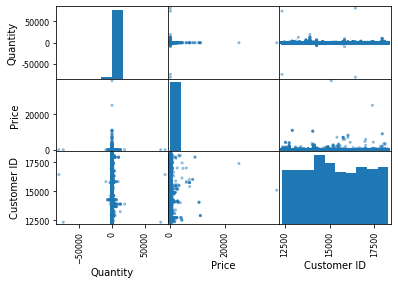

In [23]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df)

> # **Part 2: Sales per country**

> ****Following points are covered:****
> * Total sales for product lines
> * Visual representation of Total sales of products Countrywise
> * Visual representation of Quantity of products sold in each Country**


In [24]:
#computing sales of each entry in data
#adding new column of Total sales in the dataframe
#checking for addition of new column in the dataframe
#the total sales occured on each invoice has been calculated as follows: total sales = quantity x price
df['Total_sales'] = df['Quantity'] * df['Price']
df.head() 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


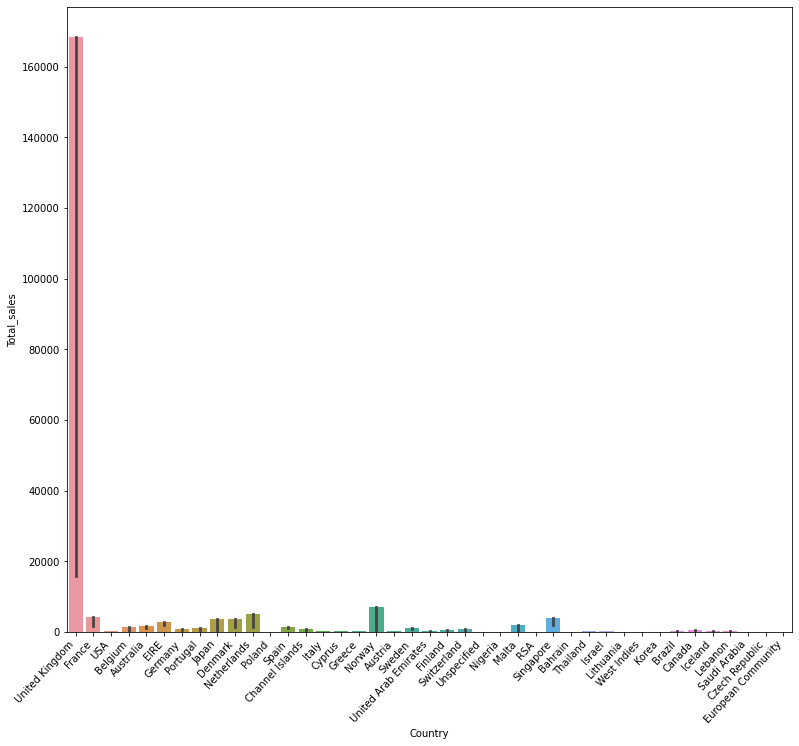

In [25]:
#bar graph to visualize the total sales occured per country

fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Total_sales',data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

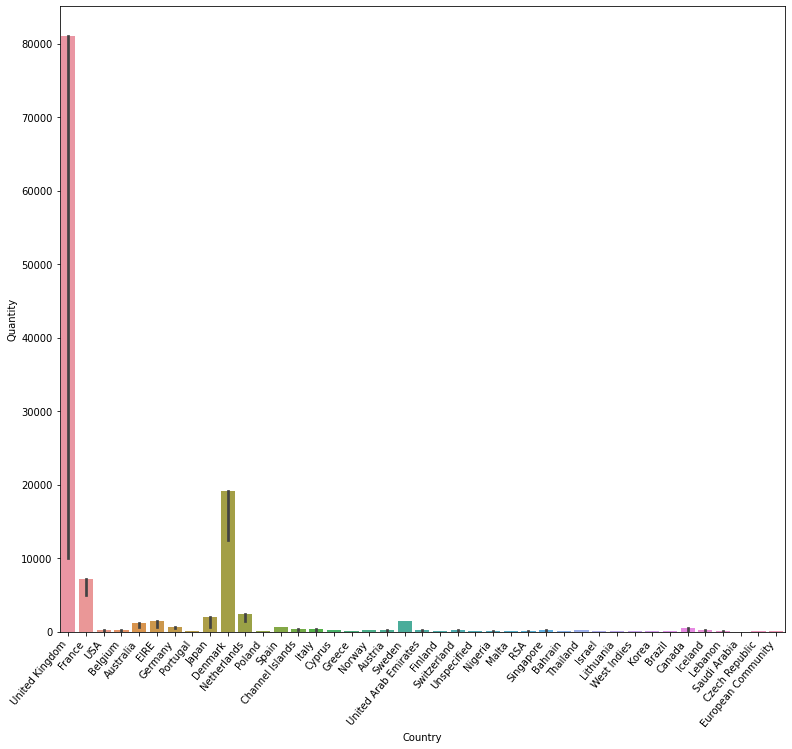

In [26]:
#bar graph to visualize the Quantity sold per Country
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Quantity',data=df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

> # **Part 3: Case study on UK**

> ****Further opportunities of target market:****
> * As it can be seen from the bar graphs that UK has had maximum Total sales and Quantity of products sold. 
> * It can be concluded that major sale market is UK. 
> * Further exploration of data for UK region can be done to analyse the most bought product in UK. 
> * Eventually, this answers our first business question - Future opportunities in a particular market.

In [27]:
#checking of unique values of Customers for UK 
df[df['Country']=='United Kingdom']['Customer ID'].nunique()

5410

In [28]:
sales_uk = df[df['Country']=='United Kingdom']
sales_uk.describe()

,Quantity,Price,Customer ID,Total_sales
count,716115.000000,716115.000000,716115.000000,716115.000000
mean,11.442740,3.480462,15545.327850,18.827290
std,193.223234,70.893157,1592.771841,328.669454
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,14191.000000,4.130000
50%,4.000000,1.950000,15544.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.700000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [29]:
print("Number of transactions: ", sales_uk['Invoice'].nunique())
print("Number of products bought: ",sales_uk['StockCode'].nunique())
print("Number of customers:", sales_uk['Customer ID'].nunique() )
print("Percentage of customers NA: ", round(sales_uk['Customer ID'].isnull().sum() * 100 / len(sales_uk),2),"%" )
print('Number of countries: ',sales_uk['Country'].nunique())

Number of transactions:  40505
Number of products bought:  4631
Number of customers: 5410
Percentage of customers NA:  0.0 %
Number of countries:  1


In [30]:
#checking for most bought product in UK
groupedProduct = sales_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)

,StockCode,Quantity
3413,84077,95056
4058,85099B,83115
4080,85123A,80937
3820,84879,72098
1405,22197,70235
108,17003,69011
600,21212,65639
1218,21977,44821
3939,84991,39866
16,15036,35613




>**Apriopri Algorithm for UK**



In [31]:
# Stripping extra spaces in the description
df['Description'] = df['Description'].str.strip()

# Dropping the rows without any invoice number
df.dropna(axis = 0, subset =['Invoice'], inplace = True)
df['Invoice'] = df['Invoice'].astype('str')

# Dropping all transactions which were done on credit
df = df[~df['Invoice'].str.contains('C')]

In [32]:
# Transactions done in France
#basket_France = (df[df['Country'] =="France"]
#          .groupby(['Invoice', 'Description'])['Quantity']
#          .sum().unstack().reset_index().fillna(0)
#          .set_index('Invoice'))
  
# Transactions done in the United Kingdom
basket_UK = (df[df['Country'] =="United Kingdom"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))
  

In [33]:
# Defining the hot encoding function to make the data suitable 
# for the concerned libraries
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
  
# Encoding the datasets
#basket_encoded = basket_France.applymap(hot_encode)
#basket_France = basket_encoded
  
basket_encoded = basket_UK.applymap(hot_encode)
basket_UK = basket_encoded
  

In [34]:
# Building the model
#frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True)

# Collecting the inferred rules in a dataframe
#rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
#rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
#print(rules.head())


In [35]:
frq_items = apriori(basket_UK, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())


                                           antecedents  \
295                     (POPPY'S PLAYHOUSE LIVINGROOM)   
343  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
293                        (POPPY'S PLAYHOUSE BEDROOM)   
342  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...   
348  (REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...   

                           consequents  antecedent support  \
295        (POPPY'S PLAYHOUSE KITCHEN)            0.011715   
343  (GREEN REGENCY TEACUP AND SAUCER)            0.015710   
293        (POPPY'S PLAYHOUSE KITCHEN)            0.014070   
342  (ROSES REGENCY TEACUP AND SAUCER)            0.016395   
348  (ROSES REGENCY TEACUP AND SAUCER)            0.013385   

     consequent support   support  confidence       lift  leverage  conviction  
295            0.015829  0.010463    0.893130  56.423599  0.010278    9.209029  
343            0.024683  0.013981    0.889943  36.055592  0.013593    8.861936  
293            0.015829  0.012013  

# **Part 4: Customer Segmentation using RFM**

In [36]:
#We change the data type of the order date
df [ 'InvoiceDate' ] = pd.to_datetime ( df['InvoiceDate'])
#We set today/analysis date as a variable
today = dt.datetime (2012,1,1)
print ( today )

2012-01-01 00:00:00


In [37]:
#We find Recency and Monetary values.
data_x = df.groupby ('Customer ID').agg({'Total_sales': lambda x: x. sum (),
                                        'InvoiceDate': lambda x:( today - x. max ()).days})
#Data is based on StockCode, we make InvoiceNo unique.
data_y = df.groupby(['Customer ID','Invoice']).agg ({'Total_sales': lambda x: x.sum()})

#When we count it, InvoiceNo is unique.
data_z = data_y.groupby ('Customer ID').agg ({'Total_sales': lambda x:len(x)})

#We reach the #RFM table.
rfm_table= pd.merge(data_x,data_z,on='Customer ID')

# We set the column names
rfm_table. rename(columns= {'InvoiceDate' : 'Recency' ,
                          'Total_sales_y' : 'Frequency' ,
                          'Total_sales_x' : 'Monetary'} ,inplace= True )

In [38]:
#Frequency find
def RScore(x,p,d ): 
    if x <= d [p][0.20]:
        return 0 
    elif x <= d [p][0.40]:
        return 1 
    elif x <= d [p][0.60]:
        return 2 
    elif x <= d [p][0.80]:
        return 3 
    else:
        return 4 
quantiles = rfm_table.quantile(q= [0.20,0.40,0.60,0.80])
quantiles = quantiles.to_dict()
rfm_table['Freq_Tile'] = rfm_table['Frequency'].apply(RScore, args= ('Frequency',quantiles,))

#Recency find
rfm_table = rfm_table.sort_values('Recency' ,ascending= True)
rfm_table ['Rec_Tile'] = pd.qcut(rfm_table['Recency'], 5 ,labels= False)

#Monetary find
rfm_table.sort_values('Monetary',ascending=False)
rfm_table['Mone_Tile'] = pd.qcut(rfm_table['Monetary'] , 5 ,labels= False)

# If we do not want the 'zero' value to be included, we increase the values ​​we find by 1
rfm_table['Rec_Tile'] = rfm_table ['Rec_Tile']+1
rfm_table['Freq_Tile'] = rfm_table ['Freq_Tile']+1
rfm_table['Mone_Tile'] = rfm_table ['Mone_Tile']+1

# We combine the values ​​we find and get a single score
rfm_table['RFM Score'] = rfm_table['Rec_Tile'].map(str) + rfm_table['Freq_Tile'].map(str) + rfm_table['Mone_Tile'].map(str)
rfm_table.head()

,Monetary,Recency,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score
Customer ID,,,,,,,
12662.0,6726.540,22,20,5,1,5,155
16705.0,43515.051,22,42,5,1,5,155
12713.0,848.550,22,1,1,1,3,113
15910.0,2661.170,22,15,5,1,4,154
15694.0,9978.480,22,24,5,1,5,155


In [39]:
#We examine the contents of the values.
rfm_table.groupby('RFM Score').agg({
'Recency':['mean','min','max','count'],
'Frequency':['mean','min','max','count'],
'Monetary':['mean','min','max','count']}).round(1).head() 

Recency               Frequency               Monetary          \
             mean min max count      mean min max count     mean     min   
RFM Score                                                                  
111          33.5  23  41    42       1.0   1   1    42    165.9     0.0   
112          32.7  23  41    30       1.0   1   1    30    374.7   285.6   
113          31.4  22  40     5       1.0   1   1     5    887.7   681.0   
115          24.0  24  24     1       1.0   1   1     1   3861.0  3861.0   
121          31.0  23  41    22       2.0   2   2    22    208.3    77.4   

                         
              max count  
RFM Score                
111         280.1    42  
112         546.0    30  
113        1162.6     5  
115        3861.0     1  
121         284.5    22

# **Report and Analysis**



The project implementation has been divided into 4 parts as follows:

1.   *Exploratory Data Analysis(EDA)*
2.   *Sales per country*
1.   *Case study on UK*
2.   *Customer Segmentation using RFM*

They have been discussed in detail as shown below.

**Part 1:**

The first step is to analyse exploratory data (EDA). The EDA is useful for understanding data, discovering patterns, and detecting anomalies or null values in a dataset. The following steps have been taken:

* Examining the dataset's shape, columns, and top 5 head, tail, and sample values for each column.
* The next step was to determine whether or not the dataset contained null and duplicate values. It was discovered that the fields 'Description' and 'CustomerID' contained some null values.
* Then I checked for duplicate values and removed them with the '.dropna()' function before resetting the dataset's indexing.
* Later, to ensure that the dataset was free of duplicates and values. I used basic EDA methods once more to ensure the data was error-free.
* I did correlation for 'Quantity,' 'Price,' and 'CustomerID' to gain a better understanding of the data set. The table showed that 'Quantity' had a negative correlation with both 'Price' and 'CustomerID,' and a similar case was observed with each of them individually.

**Part 2:**

Part 2 will involve visualising the data in order to better understand the target market for future sales. To better understand sales, a new column titled 'Total sales' has been added, which is calculated using the following formula:

    Total sales = Price x Quantity

The following graphs have been visualised:
1. *Total sales in relation to country*

From this, it is clear that the United Kingdom (UK) has the highest sales of the 41 countries. Norway and Poland are next in line.
2. *Country vs. Quantity*

We can see from this graph that the United Kingdom (UK) once again had the highest number of products sold. Denmark and France followed suit.





**Part 3:**

As can be seen from the graphs above, the United Kingdom (UK) has the highest number of sales and products sold. This prompted me to conduct a case study on the data for the UK region. Because it may be the future target region for increasing sales and product sales.

We store the data related to the UK region in a new 'dataframe' here so that it can be accessed frequently. We calculate that the UK is responsible for nearly 716115 of the 797885 values in the data.

The following are the region's unique statistical values:
*   Number of transactions: 40505
*   Number of products bought: 4631
*   Number of customers: 5410

Next, look for the top ten most purchased products. This would inform the company about which products are selling the most by analysing the 'StockCode' and 'Quantity' fields. As a result, the inventory for those specific products in the UK is replenished and stocked on a timely basis.

The Apriopri Algorithm is then used to gain insight into the structured relationships of different itemsets in the region. We do 'one-hot' encoding of the grouped data of the UK region before we begin building the model because it makes it more suitable and accessible for implementation. Moving forward, we construct the Apriopri model to look for the most frequent itemsets and set the minimum support count to 0.01.

When the rules for British transactions are scrutinised, it is discovered that the British purchase different coloured tea-plates together. One explanation could be that the British enjoy tea and frequently collect different coloured tea-plates for various occasions.

**Part 4:**

In this section, we will use RFM to implement Customer Segmentation (Recency, Frequency,Monetary). It is accomplished by combining these three metrics after they have been computed. This is useful for analysing the current status of customers and segmenting them based on their scores.

> Recency: 

It is information about how long a customer has been receiving services from a company and its membership term. Calculated as follows:

    Last subscription date/ last order date from today

> Frequency:

This metric is frequently useful in informing a company/organization about how frequently a customer purchases. It yields the following results:

    Order number/order code

> Monetary:

This metric describes the total cost of the customer's expenses. It is useful in informing an organisation about the revenue generated after receiving services from it. It can be calculated by adding up a customer's expenses over the course of their life.

The above RFM implementation can be interpreted as follows. They are discussed further below: Let us interpret segment 111 as an example:

* This segment has 42 people. 
* Their last purchase was nearly 33 days ago on average. 
* Their shopping frequency is one, so they have one purchase. 
* A total of around $165.9 was spent.